## Experiment with Pooling
- In this notebook we have performed Image classification by using MNIST dataset with Lenet rhitecture without using Pooling layers, we can observe the number of parameters which are increasing exponentially. This will take more time as well as large amount of computing time.

- We can achieve same result with much lesser parameters (as we seen in earlier examples) by using pooling layers which generalizes the model well. In addition,  It reduces the number of parameters to great extent without affecting the model performance.


**Datasets and Pre Processing**

In [0]:
import keras
import math
from keras.datasets import mnist

In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [0]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


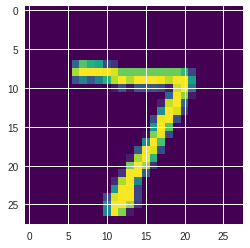

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='viridis')

In [0]:
print(xtest[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [0]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

60000
28
28


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')/255
xtest = xtest.reshape(xtest.shape[0],28,28,1).astype('float32')/255

In [0]:
#print(xtest[0])

In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [0]:
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
import keras
from keras import models
from keras import layers

**Mounting In Colab**

In [0]:
import os
from google.colab import drive
drive.mount('/content/cnn')
os.chdir('/content/cnn/My Drive')

Drive already mounted at /content/cnn; to attempt to forcibly remount, call drive.mount("/content/cnn", force_remount=True).


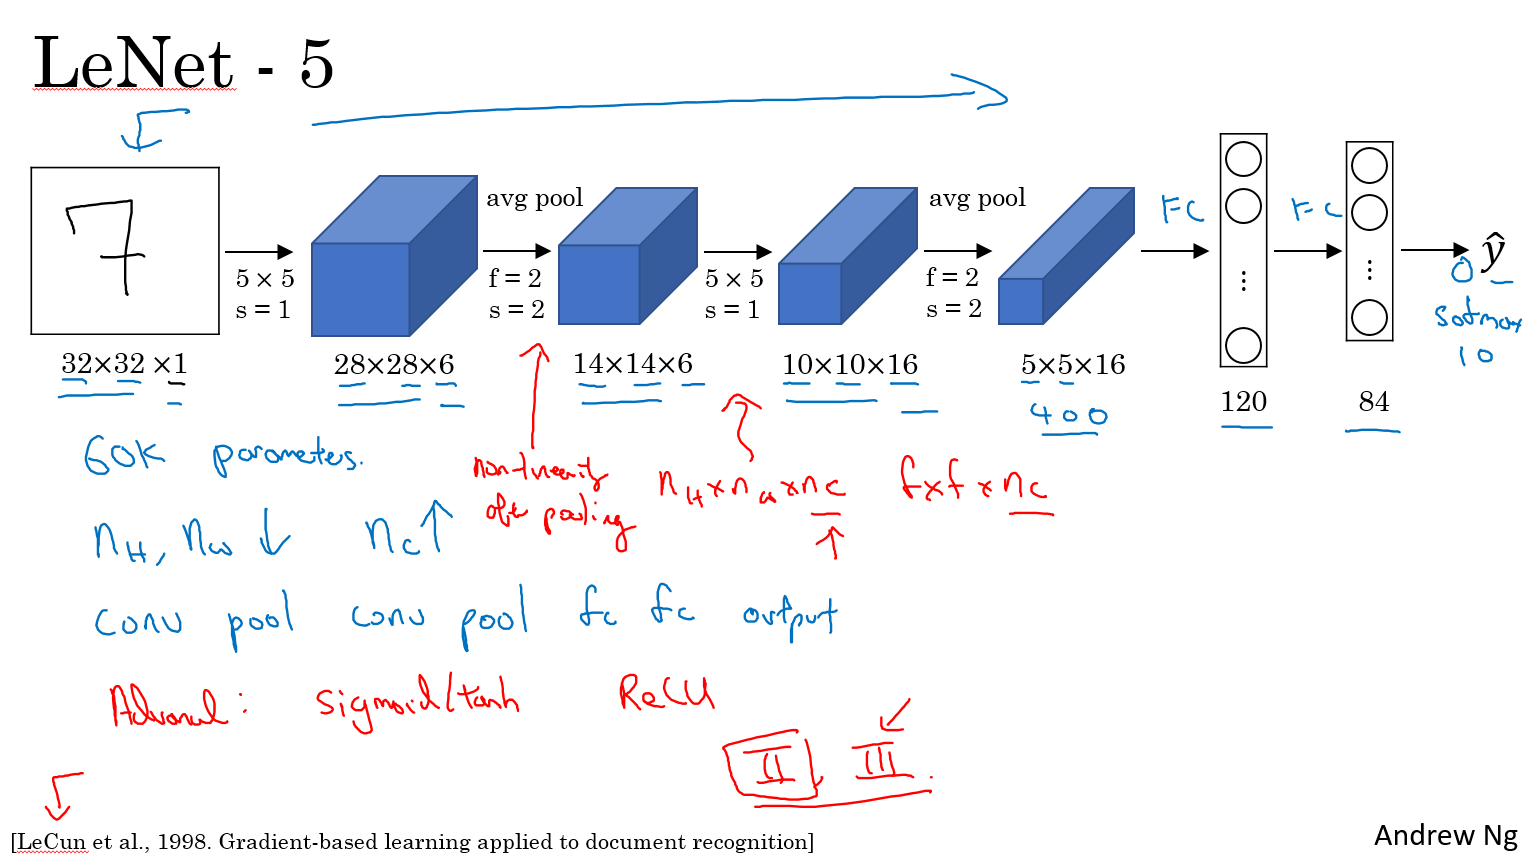

In [0]:
from IPython.display import Image, display
display(Image(filename="/content/cnn/My Drive/CNN_Tutorial/Test_Images/a.png"))

**LeNet Model**

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
#model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
#model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 16)        2416      
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               768120    
_________________________________________________________________
dense_5 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                850       
Total params: 781,706
Trainable params: 781,706
Non-trainable params: 0
_________________________________________________________________


**Saving Model as Image**

In [0]:
#from keras.utils import plot_model
#plot_model(model, to_file="a.png")

**Visualization of randomly initialized filters**


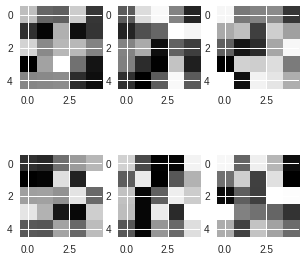

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

**Compile the model**

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [0]:
from sklearn.model_selection import train_test_split 

**Keras Callbacks**
* ModelCheckPoint
* TensorBoard
* CSVLogger
* ReduceOnPlateu

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Original_LeNet.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/CNN_Tutorial/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Original_LeNet.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)

**Fit the model**

In [0]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, epochs=25, verbose=2,callbacks=[cv,mc,tb])

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 4s - loss: 0.2681 - acc: 0.9202 - val_loss: 0.0904 - val_acc: 0.9749
Epoch 2/25
 - 3s - loss: 0.0718 - acc: 0.9782 - val_loss: 0.0549 - val_acc: 0.9838
Epoch 3/25
 - 2s - loss: 0.0469 - acc: 0.9855 - val_loss: 0.0534 - val_acc: 0.9841
Epoch 4/25
 - 2s - loss: 0.0305 - acc: 0.9908 - val_loss: 0.0530 - val_acc: 0.9844
Epoch 5/25
 - 3s - loss: 0.0230 - acc: 0.9926 - val_loss: 0.0465 - val_acc: 0.9877
Epoch 6/25
 - 3s - loss: 0.0177 - acc: 0.9944 - val_loss: 0.0576 - val_acc: 0.9833
Epoch 7/25
 - 3s - loss: 0.0135 - acc: 0.9958 - val_loss: 0.0443 - val_acc: 0.9884
Epoch 8/25
 - 2s - loss: 0.0128 - acc: 0.9956 - val_loss: 0.0452 - val_acc: 0.9881
Epoch 9/25
 - 3s - loss: 0.0081 - acc: 0.9975 - val_loss: 0.0542 - val_acc: 0.9851
Epoch 10/25
 - 3s - loss: 0.0068 - acc: 0.9979 - val_loss: 0.0533 - val_acc: 0.9878
Epoch 11/25
 - 3s - loss: 0.0076 - acc: 0.9971 - val_loss: 0.0588 - val

**Evaluate**

In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 1s 72us/step
0.051783079731966566
0.989


**Loss and Acc Curves**

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(25)

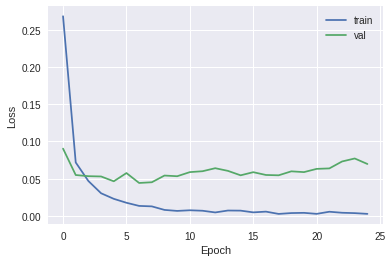

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

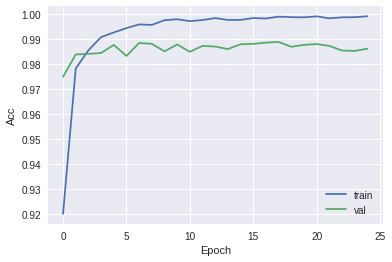

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

**Prediction**

In [0]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[1.1924228e-15 5.4721975e-15 5.8822500e-13 5.2148997e-11 9.4810544e-20
  2.0221768e-14 1.5600608e-23 1.0000000e+00 5.7502413e-13 1.2891402e-10]]
7


1 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
4 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
5 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
6 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
7 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
8 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
9 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
11 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
12 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
13 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
14 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
15 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
16 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
17 Actual is  [0. 0. 0. 0. 0. 0. 

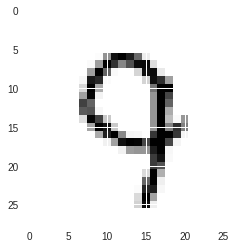

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(1000):
    plt.imshow(xtest[i].reshape(28, 28),cmap='Greys')
    pred = model.predict(xtest[i].reshape(1, 28, 28, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

**Confusion Matrix**

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99       980
     class 1       1.00      0.99      0.99      1135
     class 2       0.98      0.99      0.99      1032
     class 3       0.99      0.99      0.99      1010
     class 4       0.99      0.99      0.99       982
     class 5       0.98      0.99      0.98       892
     class 6       0.99      0.99      0.99       958
     class 7       1.00      0.99      0.99      1028
     class 8       0.98      0.99      0.99       974
     class 9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 976    0    0    0    0    0    2    0    2    0]
 [   1 1124    0    2    1    3    2    1    1    0]
 [   0    0 1026    1    1    0    1    1    2    0]
 [   0    0    5  996    0    6    0    0    3    0]
 [   0    0    1    0  973    0    1    0    1    6]
 [   1    0    1    4    0  882    1    0    2    1]
 [   4    2    0    0    1    3  944    0    4    0]
 [   1    1    8    0    0    0    0 1014    1    3]
 [   2    0    4    1    0    0    0    0  967    0]
 [   0    2    0    0    5    5    0    3    6  988]]


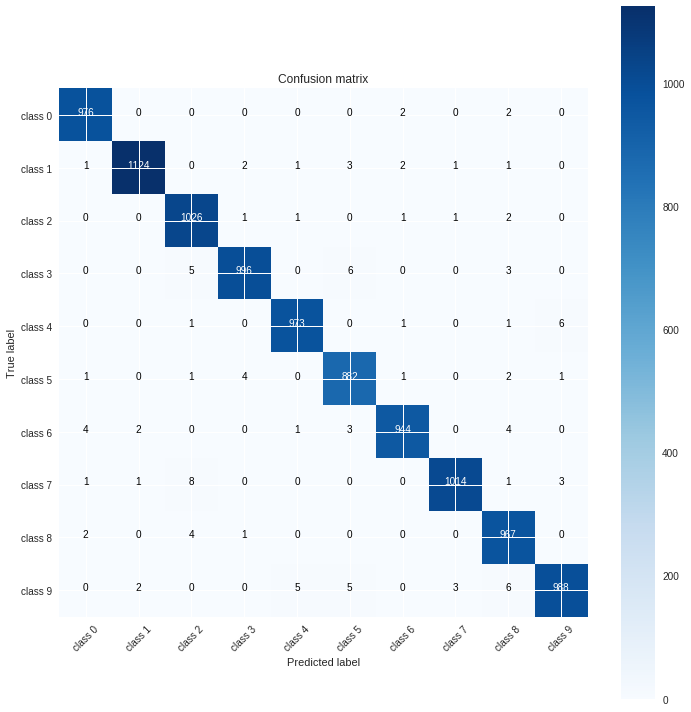

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

**Layers of Model**

In [0]:
for layer in model.layers:
  print(layer)

**Visualizing The Activations**

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))


In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

(1, 24, 24, 6)
(1, 20, 20, 16)
(1, 6400)
(1, 120)
(1, 84)
(1, 10)


IndexError: ignored

**Ist Activation (Convolution_1)**

In [0]:
print(activations[0].shape)
display_activation(activations,3,2,0)

**2nd Activation (MaxPooling_1)**

In [0]:
print(activations[1].shape)
display_activation(activations,3,2,1)

**3rd Activation (Convolution_2)**

In [0]:
print(activations[2].shape)
display_activation(activations,4,4,2)

**4th Activation (MaxPooling_2)**

In [0]:
print(activations[3].shape)
display_activation(activations,4,4,3)

**Classification in final layer**

In [0]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

**Visualization of filters**

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

In [0]:
#https://www.codeastar.com/visualize-convolutional-neural-network/
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

In [0]:
'''def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1

  x += 0.5
  x = np.clip(x, 0, 1)

  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x'''

In [0]:
'''def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])
  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  iterate = K.function([model.input], [loss, grads])
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)'''

In [0]:
'''plt.imshow(generate_pattern('conv2d_4', 0))'''

In [0]:
'''layer_name = 'conv2d_3'
size = 6
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
for i in range(8): 
  for j in range(8): 
    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results)'''